# Import libraries and load the data

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('../data/sierraleone-bumbuna.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


# Summary statistics & missing values

In [2]:
df.columns = df.columns.str.strip()  # Clean column names
df.describe()
df.isna().sum()
df.isna().mean() * 100  # % of missing values

Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

# Handle missing values

In [3]:
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_clean = df.copy()

for col in cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Detect and remove outliers using Z-scores

In [6]:
# Import zscore
from scipy.stats import zscore

z_scores = df_clean[cols].apply(zscore)
mask = (z_scores.abs() <= 3).all(axis=1)
df_clean = df_clean[mask]

# Time series preparation and plots

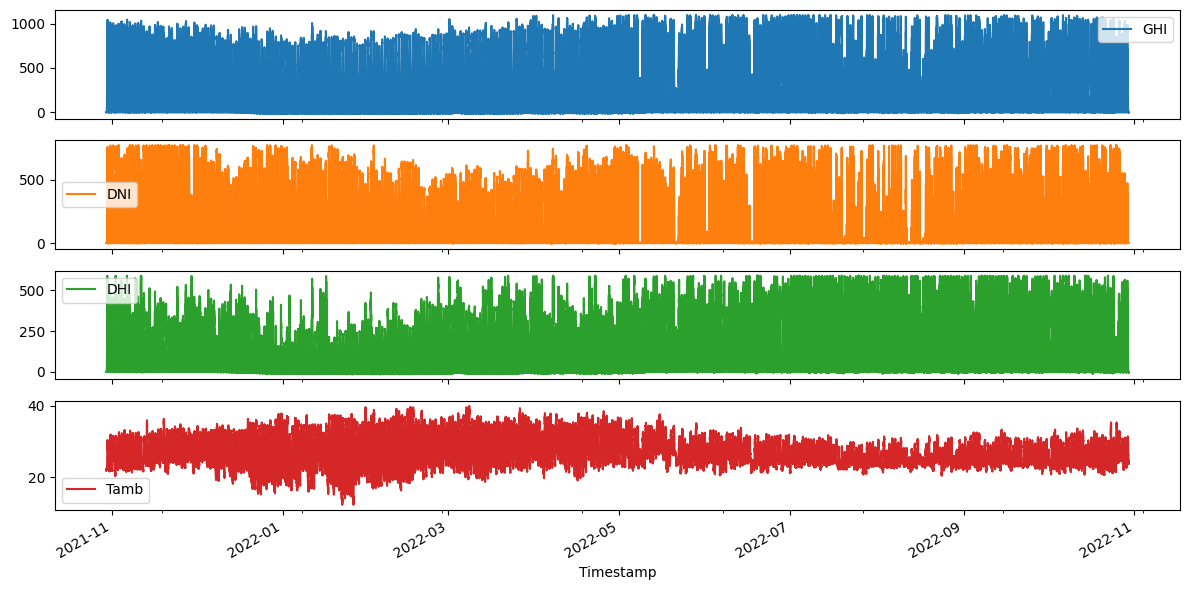

In [7]:
# Import matplotlib
import matplotlib.pyplot as plt

df_clean['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Use original df if needed
df_clean.set_index('Timestamp', inplace=True)

df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(12, 6))
plt.tight_layout()
plt.show()